In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Tumor response to treatment

In [6]:
clinical_trial_df = pd.read_csv("../Resources/mouse_drug_data.csv")
clinical_trial_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
mouse_drug = pd.read_csv("../Resources/clinicaltrial_data.csv")
mouse_drug.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
mouse_clinical_trial = pd.merge(clinical_trial_df, mouse_drug, on="Mouse ID", how="outer")
mouse_clinical_trial

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [9]:
tumor_responses = pd.DataFrame(mouse_clinical_trial.groupby(["Drug", "Timepoint"]).mean())
tumor_responses = tumor_responses[["Tumor Volume (mm3)"]]

In [10]:
tumor_responses = tumor_responses.reset_index()

In [11]:
tumor_responses

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [254]:
tumor_responses_sem = mouse_clinical_trial.groupby(["Drug", "Timepoint"])
tumor_responses_sem = tumor_responses_sem[["Tumor Volume (mm3)"]]
tumor_responses_sem = pd.DataFrame(tumor_responses_sem.sem())
tumor_responses_sem = tumor_responses_sem.reset_index()
tumor_responses_sem

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [255]:
tumor_responses_pivot_table = tumor_responses.pivot_table(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tumor_responses_pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


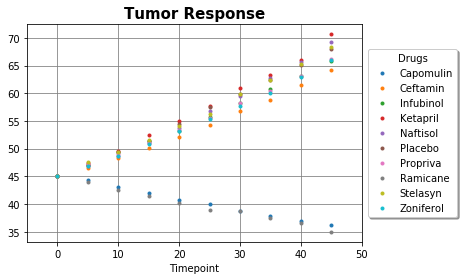

In [290]:
tumor_responses_pivot_table.plot(style=".")
plt.grid(color="gray")
plt.title("Tumor Response", fontsize=15, fontweight=600)
plt.xlim(-5, 50)
plt.legend(loc="center right", bbox_to_anchor=(1.3, .5), shadow=True, title="Drugs")

<ErrorbarContainer object of 3 artists>

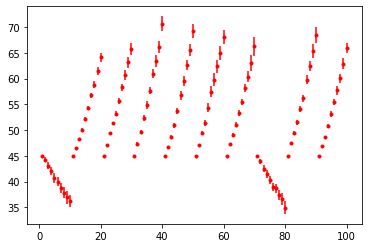

In [257]:
_, tumor_error_fig = plt.subplots()
tumor_error_fig.errorbar(np.arange(len(tumor_responses))+1, tumor_responses["Tumor Volume (mm3)"], yerr=tumor_responses_sem["Tumor Volume (mm3)"], fmt=".", color="red")




# Metastatic response to treatment

In [17]:
metastatic_response_mean = mouse_clinical_trial.groupby(["Drug", "Timepoint"])
metastatic_response_mean = metastatic_response_mean[["Metastatic Sites"]]

In [18]:
metastatic_response = pd.DataFrame(metastatic_response_mean.mean())
metastatic_response = metastatic_response.reset_index()
metastatic_response

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [19]:
metastatic_response_sem = mouse_clinical_trial.groupby(["Drug", "Timepoint"])
metastatic_response_sem = metastatic_response_sem[["Metastatic Sites"]]
metastatic_response_sem = pd.DataFrame(metastatic_response_sem.sem())
metastatic_response_sem = metastatic_response_sem.reset_index()
metastatic_response_sem

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [258]:
metastatic_response_pivot_table = metastatic_response.pivot_table(values="Metastatic Sites", index="Timepoint", columns="Drug")
metastatic_response_pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


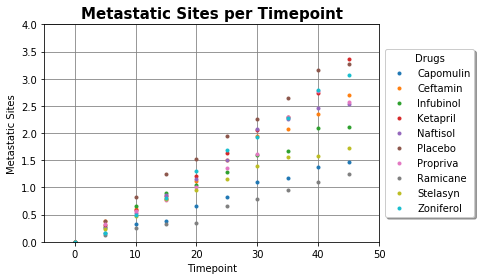

In [289]:
metastatic_response_pivot_table.plot(style=".")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Sites per Timepoint", fontsize=15, fontweight=600)
plt.xlim(-5, 50)
plt.ylim(0, 4.0, .5)
plt.grid(color="gray")
plt.legend(loc="center right", bbox_to_anchor=(1.3, .5), shadow=True, title="Drugs")

<ErrorbarContainer object of 3 artists>

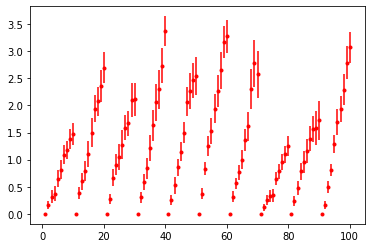

In [260]:
_, metastatic_error_bars = plt.subplots()
metastatic_error_bars.errorbar(np.arange(0, len(metastatic_response), 1)+1, metastatic_response["Metastatic Sites"], yerr=metastatic_response_sem["Metastatic Sites"], fmt=".", color="red")

# Survival Rates

In [22]:
mouse_count = mouse_clinical_trial.groupby(["Drug", "Timepoint"])
mouse_count = pd.DataFrame(mouse_count.count()["Mouse ID"])

In [23]:
mouse_count.columns = ["Mouse Count"]
mouse_count = mouse_count.reset_index()

In [24]:
mouse_count

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


mouse_count_pivot_table = mouse_count.pivot_table(values="Mouse Count", index="Timepoint", columns="Drug")
mouse_count_pivot_table

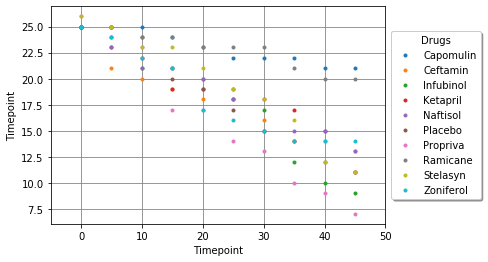

In [295]:
mouse_count_pivot_table.plot(style=".")
plt.ylabel("Timepoint")
plt.xlim(-5, 50)
plt.grid(color="gray")
plt.legend(loc="center right", bbox_to_anchor=(1.3, .5), title="Drugs", shadow=True)

# Summary Bar Graph

In [145]:
drugs = list(mouse_clinical_trial.groupby("Drug").sum().index)
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [146]:
summary_means = mouse_clinical_trial.groupby(["Drug", "Timepoint"]).mean()
summary_means["Tumor Volume (mm3)"]["Capomulin", 0]

45.0

In [150]:
percentage_changes = list()
for drug in drugs:
    original_value = summary_means["Tumor Volume (mm3)"][f"{drug}", 0]
    last_value = summary_means["Tumor Volume (mm3)"][f"{drug}", 45]
    increase = last_value - original_value
    percentage_change = increase / original_value * 100
    percentage_changes.append(percentage_change)
percentage_changes

[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

In [198]:
summary_df = pd.DataFrame({
    "Drugs": drugs,
    "Percentage Changes": percentage_changes
})

In [203]:
summary_df = summary_df.set_index("Drugs")

In [204]:
summary_df

,Percentage Changes
Drugs,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [206]:
passing_drugs_df = summary_df.loc[summary_df["Percentage Changes"] > 0, :]
passing_drugs_df

,Percentage Changes
Drugs,
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Stelasyn,52.085134
Zoniferol,46.579751


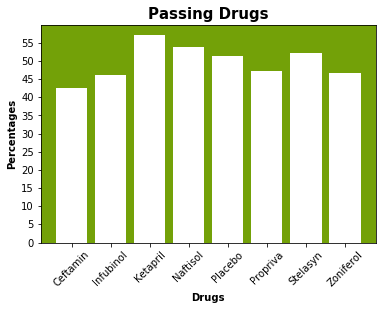

In [216]:
passing_drugs = [ percent for percent in percentage_changes if percent > 0 ]
passing_drugs
plt.bar(np.arange(len(passing_drugs)), passing_drugs, color="white")
plt.yticks(np.arange(0, 60, 5))
plt.xticks(np.arange(len(passing_drugs_df)), list(passing_drugs_df.index), rotation=45)
plt.title("Passing Drugs", fontsize=15, fontweight=600)
plt.xlabel("Drugs", fontweight=600)
plt.ylabel("Percentages", fontweight=600)
plt.gca().set_facecolor("#73A108")

Text(0, 0.5, 'Percentages')

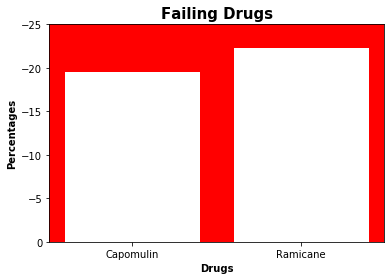

In [229]:
failing_drugs = [ percent for percent in percentage_changes if percent < 0 ]
failing_drugs_df = summary_df.loc[summary_df["Percentage Changes"] < 0, :]
failing_drugs_df
plt.gca().set_facecolor("red")
plt.bar(np.arange(len(failing_drugs)), failing_drugs, color="white")
plt.xticks(np.arange(len(failing_drugs_df)), list(failing_drugs_df.index))
plt.ylim(0, -25, -5)
plt.title("Failing Drugs", fontsize=15, fontweight=600)
plt.xlabel("Drugs", fontweight=600)
plt.ylabel("Percentages", fontweight=600)